# Vergleich der einzelnen Fitness Funktionen

In [1]:
# imports
# add folder to syspath to import GeneticAlgorithm 
import os
import numpy as np
import sys
path = os.path.dirname(os.path.dirname(os.path.abspath('')))
sys.path.insert(0, path+'/GeneticAlgorithm')
from GeneticAlgorithm import GeneticAlgorithm

# add folder to syspath to import ParticleSwarmOptimization
sys.path.insert(0, os.path.dirname(path)+'/ParticleSwarmOptimization')
 # add folder to syspath to import ACO 
sys.path.insert(0, os.path.dirname(path)+'/AntColonyOptimization')

import numpy as np
from matplotlib import pyplot as plt

In [22]:
# lade die Probleme
# small problem
small_objects  = np.load(os.path.join(path,'Compare/Ressources/betterproblem/small_objects.npy'))
small_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/small_container.npy'))
small_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/small_optimal.npy'))
# medium Problem
medium_objects= np.load(os.path.join(path,'Compare/Ressources/betterproblem/medium_objects.npy'))
medium_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/medium_container.npy'))
medium_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/medium_optimal.npy'))
# large Problem
large_objects  = np.load(os.path.join(path,'Compare/Ressources/betterproblem/large_objects.npy'))
large_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/large_container.npy'))
large_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/large_optimal.npy'))

print('Optimale Lösungen')
print(f'Kleines Problem {small_optimal_solution}')
print(f'Medium Problem {medium_optimal_solution}')
print(f'Großes Problem {large_optimal_solution}')

[100 100]
[100 100]
Optimale Lösungen
Kleines Problem 3
Medium Problem 16
Großes Problem 35


# Funktion

In [17]:
def plot_fitness_function_compare(objects, optimal_solution, container_vol, container_weight, xlim, ylim):
    av_number = 10
    number_generations = 50
    pop_size = 60
    crossover_prob = 0.8
    mutation_prob = 0.1
    fit_heuristic = 'first_fit'
    amount_obj = len(small_objects)

    average_vals_const = np.zeros((av_number, number_generations))
    average_vals_amount_bins = np.zeros((av_number, number_generations))
    average_vals_amount_bins_pow = np.zeros((av_number, number_generations))
    average_vals_fill = np.zeros((av_number, number_generations))
    #average_vals_combined = np.zeros((av_number, number_generations))
    best_vals_const = np.zeros((av_number, number_generations))
    best_vals_amount_bins = np.zeros((av_number, number_generations))
    best_vals_amount_bins_pow = np.zeros((av_number, number_generations))
    best_vals_fill = np.zeros((av_number, number_generations))
    #best_vals_combined = np.zeros((av_number, number_generations))

    fig = [None] * 2
    ax = [None] * 2

    for index in np.arange(av_number):
        GA = GeneticAlgorithm(objects, pop_size, container_vol, container_weight, crossover_prob, mutation_prob, number_generations, 'constant', fit_heuristic)
        _,_, average_vals_const[index], best_vals_const[index],_,_ = GA.run()
        GA = GeneticAlgorithm(objects, pop_size, container_vol, container_weight, crossover_prob, mutation_prob, number_generations, 'amount_bins', fit_heuristic)
        _,_, average_vals_amount_bins[index], best_vals_amount_bins[index],_,_ = GA.run()
        GA = GeneticAlgorithm(objects, pop_size, container_vol, container_weight, crossover_prob, mutation_prob, number_generations, 'amount_bins_pow', fit_heuristic)
        _,_, average_vals_amount_bins_pow[index], best_vals_amount_bins_pow[index],_,_ = GA.run()
        GA = GeneticAlgorithm(objects, pop_size, container_vol, container_weight, crossover_prob, mutation_prob, number_generations, 'fill', fit_heuristic)
        _,_, average_vals_fill[index], best_vals_fill[index],_,_ = GA.run()
    #    GA = GeneticAlgorithm(objects, pop_size, container_vol, container_weight, crossover_prob, mutation_prob, number_generations, 'combined', fit_heuristic)
    #    _,_, average_vals_combined[index], best_vals_combined[index],_,_ = GA.run()

    # calc average
    average_vals_const = np.average(average_vals_const, 0)
    average_vals_amount_bins = np.average(average_vals_amount_bins, 0)
    average_vals_amount_bins_pow = np.average(average_vals_amount_bins_pow, 0)
    average_vals_fill = np.average(average_vals_fill, 0)
    #average_vals_combined = np.average(average_vals_combined, 0)
    best_vals_const = np.average(best_vals_const, 0)
    best_vals_amount_bins = np.average(best_vals_amount_bins, 0)
    best_vals_amount_bins_pow = np.average(best_vals_amount_bins_pow, 0)
    best_vals_fill = np.average(best_vals_fill, 0)
    #best_vals_combined = np.average(best_vals_combined, 0)

    # Plot
    x_vals = np.arange(number_generations)
    # Punkte visualisieren
    fig[0], ax[0] = plt.subplots(1,figsize=(16,9))
    fig[1], ax[1] = plt.subplots(1,figsize=(16,9))
    fig[0].tight_layout(h_pad=6)
    fig[1].tight_layout(h_pad=6)
    ax[0].set_xlim(xlim)
    ax[0].set_ylim(ylim)
    ax[1].set_xlim(xlim)
    ax[1].set_ylim(ylim)
    ax[0].set_xlabel('Generation/Iteration')
    ax[1].set_xlabel('Generation/Iteration')
    ax[0].set_ylabel("Number of Bins")
    ax[1].set_ylabel("Number of Bins")
    ax[0].set_title(f'Average Number of bins for {amount_obj} Objects (Average {av_number} runs)')
    ax[0].plot(x_vals, average_vals_const, color="blue", label = 'Constant Fitness Function')
    ax[0].plot(x_vals, average_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
    ax[0].plot(x_vals, average_vals_amount_bins_pow, color="orange", label = 'Amount Bins Pow Fitness Function')
    ax[0].plot(x_vals, average_vals_fill, color="red", label = 'Fill Fitness Function')
    ax[0].plot(x_vals, [optimal_solution]*len(x_vals), color = "black",linestyle = 'dashed', label = f'Optimal Solution ({optimal_solution} Container)')
    #ax[0].plot(x_vals, average_vals_combined, color="purple", label = 'Combined Fitness Function')
    ax[0].legend()
    ax[1].set_title(f'Best Number of bins for {amount_obj} Objects (Average {av_number} runs)')
    ax[1].plot(x_vals, best_vals_const, color="blue", label = 'Constant Fitness Function')
    ax[1].plot(x_vals, best_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
    ax[1].plot(x_vals, best_vals_amount_bins_pow, color="orange", label = 'Amount Bins Pow Fitness Function')
    ax[1].plot(x_vals, best_vals_fill, color="red", label = 'Fill Fitness Function')
    ax[1].plot(x_vals, [optimal_solution]*len(x_vals), color = "black",linestyle = 'dashed', label = f'Optimal Solution ({optimal_solution} Container)')
    #ax[1].plot(x_vals, best_vals_combined, color="purple", label = 'Combined Fitness Function')
    ax[1].legend()
    plt.show()

# Small Problem

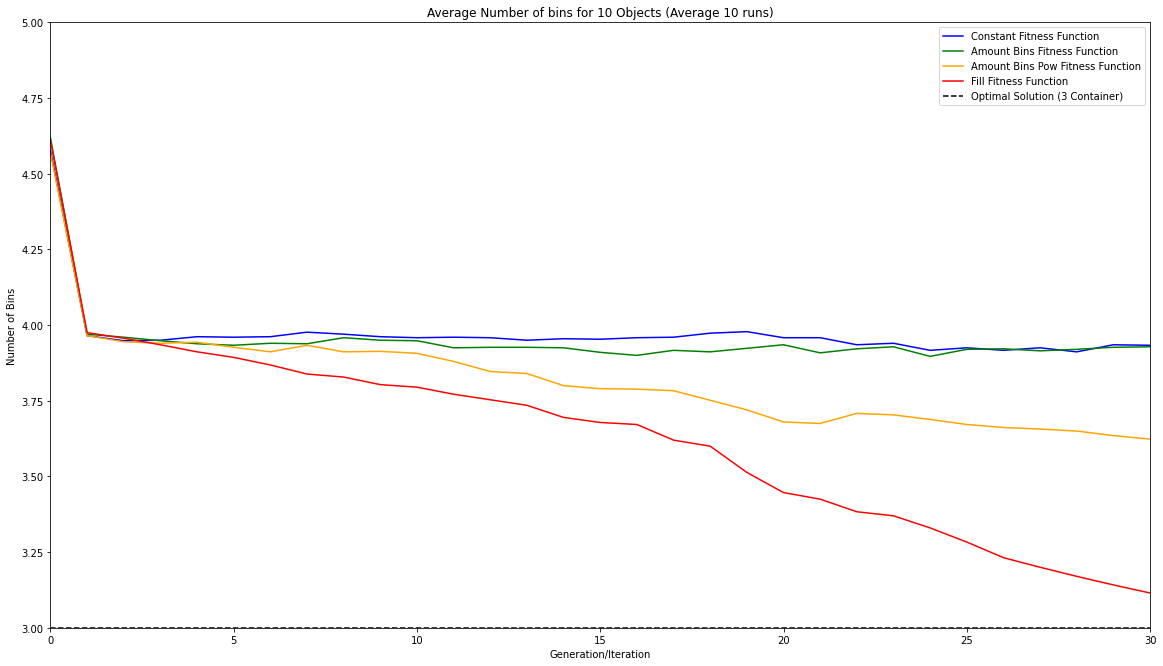

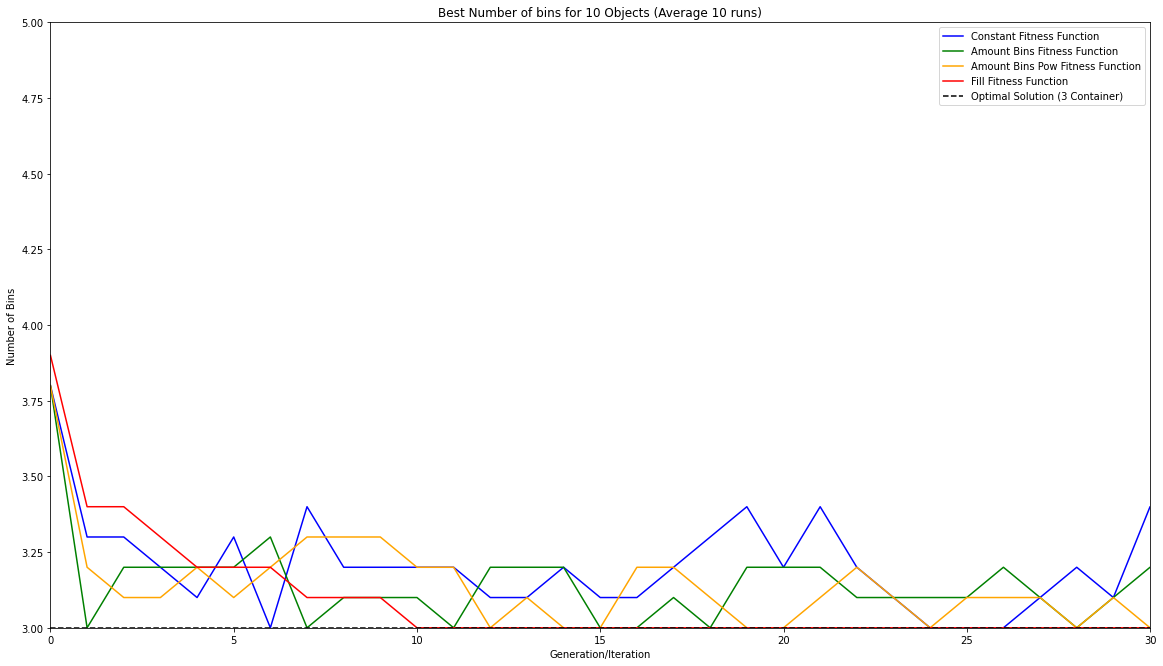

In [18]:
plot_fitness_function_compare(small_objects, small_optimal_solution, small_container[0], small_container[1], [0,50], [2,5])

# Medium Problem

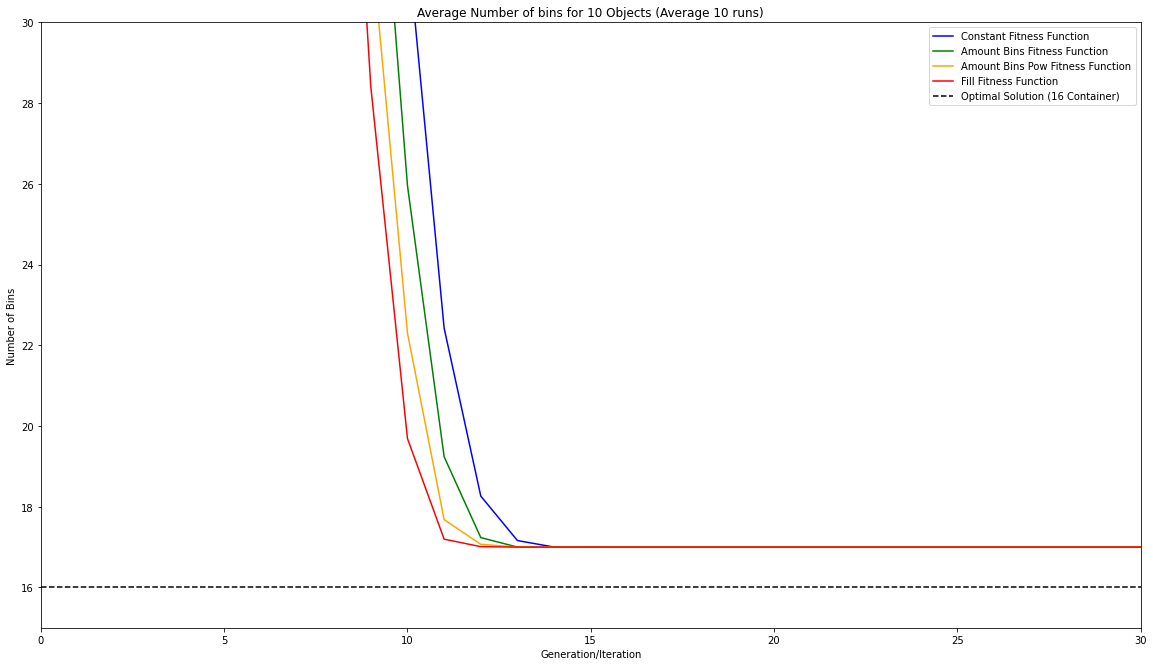

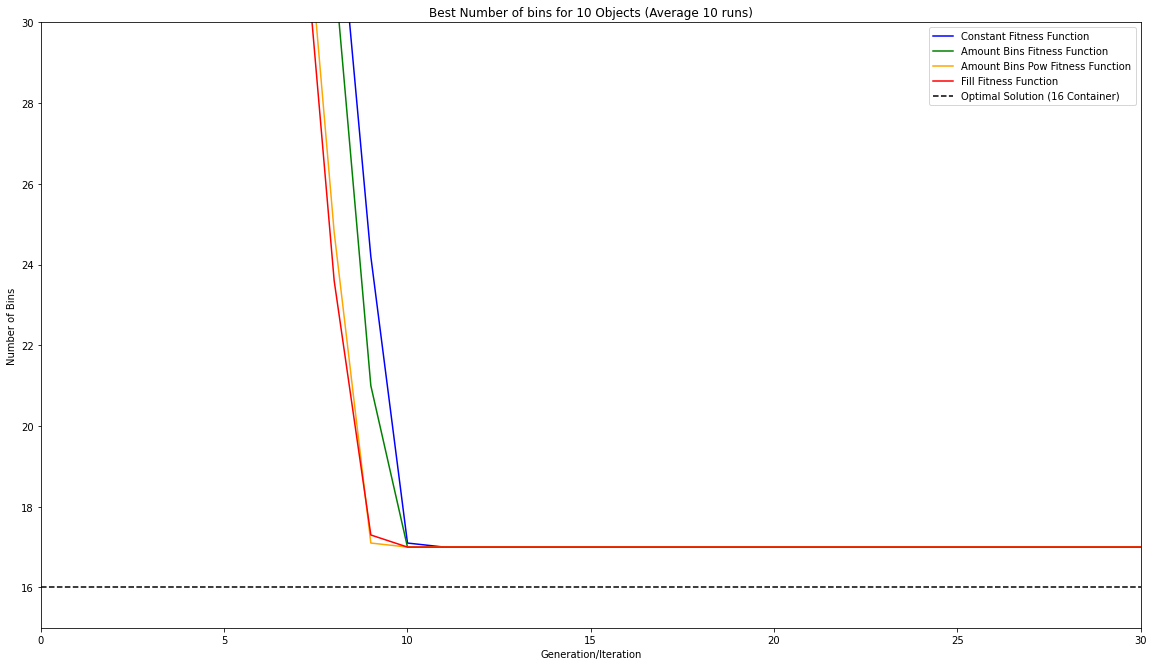

In [24]:
plot_fitness_function_compare(medium_objects, medium_optimal_solution, medium_container[0], medium_container[1], [0,50], [15, 50])

# Large Problem

In [20]:
plot_fitness_function_compare(large_objects, large_optimal_solution, large_container[0], large_container[1], [0,50], [35, 100])

KeyboardInterrupt: 